# The Three Prisoners Problem (part 3)

The next variation we're gonna examine is:

## What if the pardoned prisoner is not uniformly chosen at random?

Here we're gonna assume the warden bevahes as in the original description of the problem, but we're gonna see what happens when we don't choose the pardoned prisoner uniformly. We're mainly interested in answering the following question:

> Given the warden's answer, what is the probability of correctly guessing the pardoned prisoner?

Remember that answering this questions in terms of QIF basically means finding the posterior vulnerability of $W$, $V(\pi, W)$.

First let's do some basic imports and definitions in python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
try:
    from qif import *
except: # install qif if not available (for running in colab, etc)
    import IPython; IPython.get_ipython().run_line_magic('pip', 'install qif')
    from qif import *

In [2]:
def get_W(p):
    C = np.array([
        [0, p, 1-p],
        [0, 0,   1],
        [0, 1,   0],
    ])
    return C

def get_distribution(p):
    return np.array([p, (1-p)/2,(1-p)/2])

Now remember that if you call

In [3]:
get_distribution(1/3)

array([0.33333333, 0.33333333, 0.33333333])

you get the uniform distribution and if you call

In [4]:
get_W(1/2)

array([[0. , 0.5, 0.5],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ]])

you get the original $W$.

We are gonna keep the original $W$ but experiment with `get_distribution(p)` for different values of `p` and for each those values find out its prior and posterior vulnerability.

### Prior vunlerability

Take a look at the following graph.

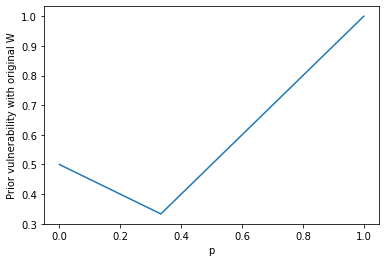

In [5]:
ps = np.linspace(0, 1, 100)
plt.plot(ps, [measure.bayes_vuln.prior(get_distribution(p)) for p in ps])
plt.xlabel('p')
plt.ylabel('Prior vulnerability with original W')
None

The x-axis corresponds to the `p` parameter of `get_distribution(p)` and the y-axis to the vulnerability of the distribution produced by `get_distribution(p)`.

The code below prints for each parameter `p` its corresponding distribution and marks the element with the highest probability which is basically our best guess for that particular distribution. Notice the maximum elemnts of each distribution as `p` increases.

In [6]:
from print_dist import print_dist

for i in range(11):
    print("get_distribution(%2d" % i , "/10) = ", sep='', end='')
    print_dist(get_distribution(i/10), highlight_maxima=True)

get_distribution( 0/10) = (    0.00 -->0.50 -->0.50 )
get_distribution( 1/10) = (    0.10 -->0.45 -->0.45 )
get_distribution( 2/10) = (    0.20 -->0.40 -->0.40 )
get_distribution( 3/10) = (    0.30 -->0.35 -->0.35 )
get_distribution( 4/10) = ( -->0.40    0.30    0.30 )
get_distribution( 5/10) = ( -->0.50    0.25    0.25 )
get_distribution( 6/10) = ( -->0.60    0.20    0.20 )
get_distribution( 7/10) = ( -->0.70    0.15    0.15 )
get_distribution( 8/10) = ( -->0.80    0.10    0.10 )
get_distribution( 9/10) = ( -->0.90    0.05    0.05 )
get_distribution(10/10) = ( -->1.00    0.00    0.00 )


Basically what happens is:

 - For $p \in \left[ 0, \frac{1}{3}\right)$ our best guess for the pardoned prisoner is either $B$ or $C$, and as $p$ gets bigger, our probability of success gets smaller.
 - For $p = \frac{1}{3}$ our best guess is either $A$ or $B$ or $C$, and gives us the minimum chance of success among all possible values of $p$.
 - For $p \in \left(\frac{1}{3}, 1\right)$ our best guess for the pardoned prisoner is always $A$ and as $p$ gets bigger, our probability of success gets bigger as well.
 - For $p = 1$ our best guess is $A$ and we succeed with probability of $1$. That is, always!
 

### Posterior vunlerability

Now, take a look at the following graph.

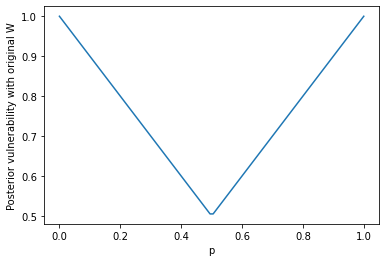

In [7]:
ps = np.linspace(0, 1, 100)
plt.plot(ps, [measure.bayes_vuln.posterior(get_distribution(p), get_W(0.5)) for p in ps])
plt.xlabel('p')
plt.ylabel('Posterior vulnerability with original W')
None

The x-axis again corresponds to the `p` parameter of `get_distribution(p)` but now the y-axis corresponds to the posterior vulnerability of $W$ when based on the distribution produced by `get_distribution(p)`. We can better understand this graph by experimenting with some values of the `p` parameter.

The code below prints for each `p` the `p` parameter itself, then the distribution $p_Y(y)$ for $y=B$ or $C$ (remember that Alice's name never pops up meaning $p_Y(A) = 0$, thus $y=A$ is omitted) and then array of the posterior distributions. Its output is basically in the form of

```
-------------------------------
|    p(Y=B)         p(Y=C)    |
-------------------------------
| p(X=A | Y=B)   p(X=A | Y=C) |
| p(X=B | Y=B)   p(X=B | Y=C) |
| p(X=C | Y=B)   p(X=C | Y=C) |
-------------------------------
```

It also marks for each column its maximum element. Notice the maximum elemnts of each column as `p` increases. 

In [8]:
from print_hyper import print_hyper

for k in range(11):
        print("\np=", k, "/10", sep='')
        print_hyper(get_W(1/2), get_distribution(k/10), highlight_maxima=True)


p=0/10
-------------------
|    0.50    0.50 |
-------------------
|    0.00    0.00 |
|    0.00 -->1.00 |
| -->1.00    0.00 |
-------------------

p=1/10
-------------------
|    0.50    0.50 |
-------------------
|    0.10    0.10 |
|    0.00 -->0.90 |
| -->0.90    0.00 |
-------------------

p=2/10
-------------------
|    0.50    0.50 |
-------------------
|    0.20    0.20 |
|    0.00 -->0.80 |
| -->0.80    0.00 |
-------------------

p=3/10
-------------------
|    0.50    0.50 |
-------------------
|    0.30    0.30 |
|    0.00 -->0.70 |
| -->0.70    0.00 |
-------------------

p=4/10
-------------------
|    0.50    0.50 |
-------------------
|    0.40    0.40 |
|    0.00 -->0.60 |
| -->0.60    0.00 |
-------------------

p=5/10
-------------------
|    0.50    0.50 |
-------------------
| -->0.50 -->0.50 |
|    0.00 -->0.50 |
| -->0.50    0.00 |
-------------------

p=6/10
-------------------
|    0.50    0.50 |
-------------------
| -->0.60 -->0.60 |
|    0.00    0.40 |
|   

Here we see that

 - For $p \in \left( 0, \frac{1}{2} \right)$ our best guess is $C$ when $y = B$ and $B$ when $y = C$ In both cases we succeed with the same probability.
 - For $p = \frac{1}{2}$ our best guess is, well, anyone.
 - For $p \in \left( \frac{1}{2}, 1 \right)$ our best guess is always $A$ no matter the channels output.

### Multiplicative leakage

The multiplicative leakage of a channel $W$ and a distribution $\pi$ is defined by 

$$
L^{\times}(\pi, W) = \frac{V(\pi, W)}{V(\pi)}
$$

and its main purpose is to provide a measure of leakage with respect to the initial vulnerability the prior distribution had.

Take a look at the following graph.

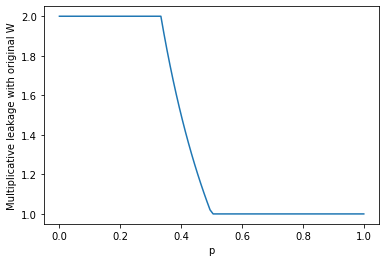

In [9]:
plt.plot(ps, [measure.bayes_vuln.mult_leakage(get_distribution(p), get_W(0.5)) for p in ps])
plt.xlabel('p')
plt.ylabel('Multiplicative leakage with original W')
None

Here we see that:

 - For $p \in \left( 0, \frac{1}{3} \right)$ $W$ makes the secret more vulnerable by doubling its prior vlunerability.
 - For $p \in \left( \frac{1}{3}, \frac{1}{2} \right)$ $W$ makes the secret less and less vulnerable compared to its initial vulnerability.
 - For $p \in \left( \frac{1}{2}, 1 \right)$ $W$ keeps the secret as vulnerable as it was before entering the channel.
 
Note that multiplicative leakage equal to $1$ does not imply $0$ vulnerability. Take for example the prior with generated by `get_distribution(9/10)` fed into $W$. Both the prior and posterior vulnerability are equal to $\frac{9}{10}$ which agrees to the fact that the multiplicative leakage is 1. But the secret is still quite vunerable. It can be guessed correctly in one try with probability of success $\frac{9}{10}$.
 
It is also interesting to notice that $L^{\times}(\pi, W)$ has an inflexion point at $p = \frac{1}{3}$, the same point where the prior vulnerability makes a turn. It also has another inflexion point at $p = \frac{1}{2}$, the same point where the posterior vulnerability makes a turn.


### Generalizing over any prior distribution

But what happens on other prior distributions? `get_distribution()` creates a very specfic form of distributions, but there are many many more. Infintely many. How can we be sure about our channels behaviour on other priors?

Here comes handy the theorem that states that

> For any channel $C$, the maximum multiplicative Bayes leakage over all priors is always realized on a uniform prior $\theta$. 

The channel's multiplicative leakage on a uniform prior (which in our case is generated by `get_distribution(1/3)`) is equal to $2$. So according to this theorem we can be sure that there is no prior which makes our channel's posterior vulnerability greater than $2$ times its prior vulnerability.

### Keep experimenting

Feel free to play around with different distributions and observe the channel's prior and posterior vulnerabilities as well as its multiplicative leakage.

In [17]:
distribution = [2/10, 6/10, 2/10] # Remember they must add up to 1
channel = get_W(1/2)

print("Prior vulnerability:", measure.bayes_vuln.prior(distribution))
print("Posterior vulnerability:", measure.bayes_vuln.posterior(distribution, channel))
print("Multiplicaative leakage:",measure.bayes_vuln.mult_leakage(distribution, channel))

Prior vulnerability: 0.6
Posterior vulnerability: 0.8
Multiplicaative leakage: 1.3333333333333335
